In [1]:
# imports
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

from distance_metrics import hassanat_distance
from helper import *
from models import knn, tnn, fixed_radius

In [2]:
# make dataset
X, y = make_blobs(n_samples=[500, 250, 400], centers=[[3,1],[1,4],[0,2]], random_state=0)

X2, y2 = make_blobs(n_samples=[400], centers=[[-2,1]], random_state=0)

X = np.concatenate([X,X2])
y = np.concatenate([y,y2])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)

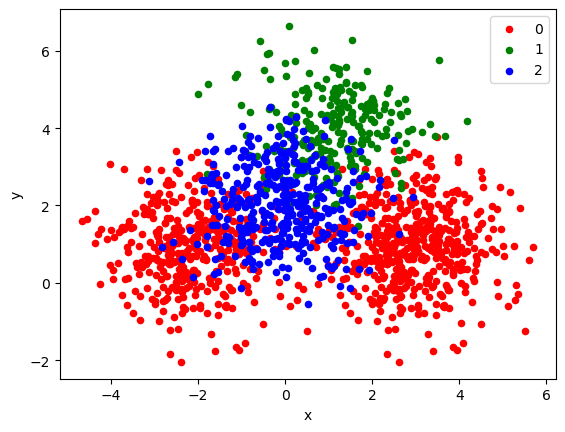

In [3]:
# render as a plot to visualize
visualize2Ddata(X, y, {0:'red', 1:'green', 2:'blue'})

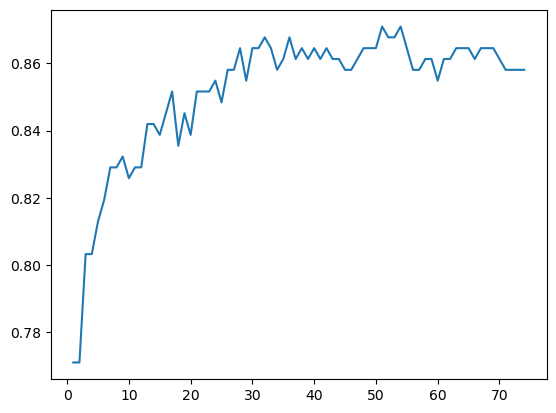

In [4]:
k_euc = best_bound(1, 75, 1, knn, X_train, y_train, X_test, y_test, display_graph=True)

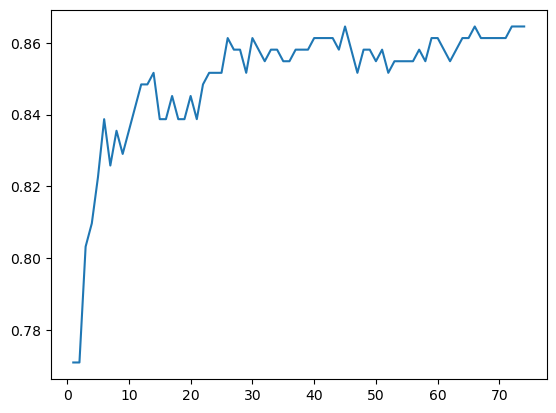

In [5]:
k_cit = best_bound(1, 75, 1, knn, X_train, y_train, X_test, y_test, display_graph=True, args={'dist_metric': 'cityblock'})

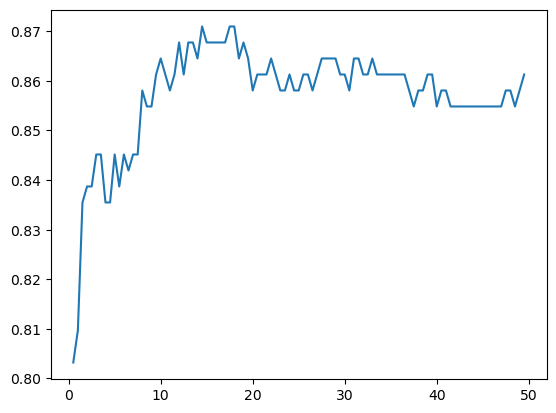

In [6]:
t = best_bound(0.5, 50, 0.5, tnn, X_train, y_train, X_test, y_test, display_graph=True)

In [ ]:
# t_hass = best_bound(0.5, 50, 0.5, tnn, X_train, y_train, X_test, y_test, display_graph=True, args={'dist_metric': hassanat_distance})

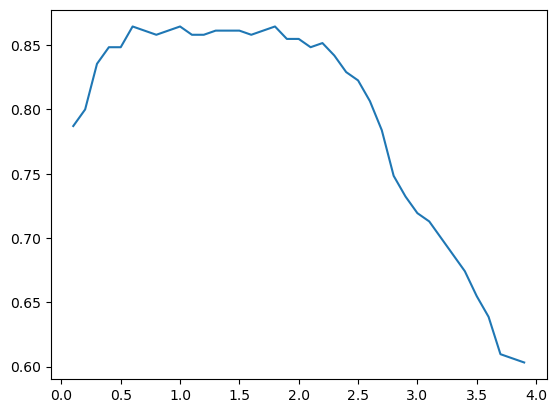

In [7]:
r = best_bound(0.1, 4, 0.1, fixed_radius, X_train, y_train, X_test, y_test, display_graph=True)

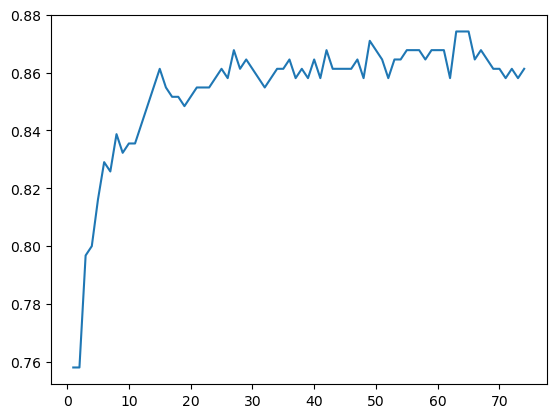

In [8]:
k_has = best_bound(1, 75, 1, knn, X_train, y_train, X_test, y_test, display_graph=True, args={'dist_metric': hassanat_distance})

In [9]:
stats(knn(X_train, y_train, X_test, k_euc), y_test, label='KNN EUCLIDEAN', print_out=True)
print('\n')
stats(knn(X_train, y_train, X_test, k_cit, 'cityblock'), y_test, label='KNN MANHATTAN', print_out=True)
print('\n')
stats(tnn(X_train, y_train, X_test, t), y_test, label='TNN EUCLIDEAN', print_out=True)
print('\n')
# stats(tnn(X_train, y_train, X_test, t_hass, hassanat_distance), y_test, label='TNN hassanat', print_out=True)
# print('\n')
stats(fixed_radius(X_train, y_train, X_test, r), y_test, label='fixed radius EUCLIDEAN', print_out=True)
print('\n')
stats(knn(X_train, y_train, X_test, k_has, hassanat_distance), y_test, label='KNN Hassanat', print_out=True)
print('\n')

KNN EUCLIDEAN:
Accuracy: 0.8709677419354839
{0: {0: 167, 1: 1, 2: 12}, 1: {0: 1, 1: 41, 2: 6}, 2: {0: 12, 1: 8, 2: 62}}


KNN MANHATTAN:
Accuracy: 0.864516129032258
{0: {0: 167, 1: 1, 2: 13}, 1: {0: 1, 1: 40, 2: 6}, 2: {0: 12, 1: 9, 2: 61}}


TNN EUCLIDEAN:
Accuracy: 0.8709677419354839
{0: {0: 167, 1: 1, 2: 12}, 1: {0: 1, 1: 40, 2: 5}, 2: {0: 12, 1: 9, 2: 63}}


FIXED RADIUS EUCLIDEAN:
Accuracy: 0.864516129032258
{0: {0: 166, 1: 1, 2: 14}, 1: {0: 1, 1: 41, 2: 5}, 2: {0: 13, 1: 8, 2: 61}}


KNN HASSANAT:
Accuracy: 0.8741935483870967
{0: {0: 169, 1: 1, 2: 10}, 1: {0: 1, 1: 39, 2: 7}, 2: {0: 10, 1: 10, 2: 63}}




In [ ]:
# find the best model
# models = {
#     'knn': [knn],
#     'knn hass': [knn, hassanat_distance],
#     'knn man': [knn, 'cityblock'],
#     'tnn': [tnn],
#     'tnn hass': [tnn, hassanat_distance],
#     'fixed_radius': [fixed_radius, 'euclidean'],
# }
# best_model(models, X_train, y_train, X_test, y_test, print_out=True)